In [7]:
import zipline
%matplotlib inline
%load_ext zipline

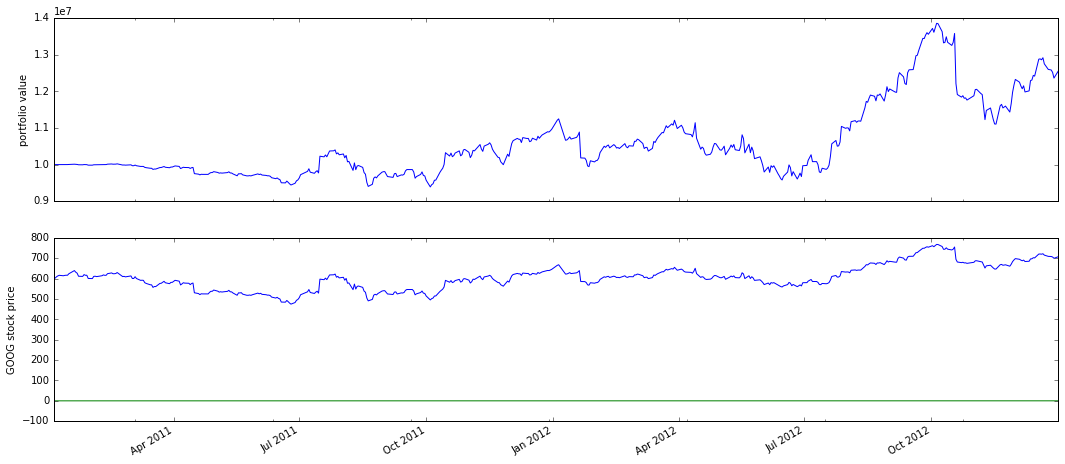

,GOOG,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2011-01-03 21:00:00,604.351,0.000000,0.000000e+00,-0.033600,0.011315,0.000000,0.000000,0.000000,10000000.000000,0.00,...,0,0,0,0.000000,10000000.000000,0.00,0.00,1,[],0.0336
2011-01-04 21:00:00,602.121,0.000001,-1.000001e-07,-0.033622,0.009987,0.141748,0.000008,-30107.050001,9969892.949999,30106.05,...,0,0,0,0.000000,10000000.000000,0.00,0.00,2,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0336
2011-01-05 21:00:00,609.071,0.000318,3.455000e-05,-0.032110,0.015044,0.100231,0.000010,-30454.550000,9939438.399999,60907.10,...,0,0,0,0.000000,9969892.949999,30106.05,30106.05,3,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0350
2011-01-06 21:00:00,613.501,0.000367,7.875000e-05,-0.028291,0.012889,0.099481,-0.001476,-30676.050000,9908762.349999,92025.15,...,0,0,0,0.000000,9939438.399999,60907.10,60907.10,4,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0344
2011-01-07 21:00:00,616.441,0.000362,1.227500e-04,-0.026185,0.011021,0.093360,-0.001969,-30823.050000,9877939.299998,123288.20,...,0,0,0,0.000000,9908762.349999,92025.15,92025.15,5,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0334
2011-01-10 21:00:00,614.211,0.000553,7.805000e-05,-0.029759,0.009629,0.086675,-0.000440,-30711.550001,9847227.749997,153552.75,...,0,0,0,-46.238590,9877939.299998,123288.20,123288.20,6,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0332
2011-01-11 21:00:00,616.011,0.000540,1.229500e-04,-0.029251,0.013390,0.080133,-0.000051,-30801.550001,9816426.199997,184803.30,...,0,0,0,-45.237075,9847227.749997,153552.75,153552.75,7,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0337
2011-01-12 21:00:00,616.871,0.000502,1.486500e-04,-0.029464,0.022518,0.084200,0.000217,-30844.550001,9785581.649996,215904.85,...,0,0,0,-45.304644,9816426.199997,184803.30,184803.30,8,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0340
2011-01-13 21:00:00,616.691,0.000488,1.422500e-04,-0.029781,0.020769,0.082298,0.000664,-30835.550001,9754746.099995,246676.40,...,0,0,0,-63.722531,9785581.649996,215904.85,215904.85,9,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0334
2011-01-14 21:00:00,624.181,0.001496,4.417500e-04,-0.026480,0.028307,0.081684,0.006048,-31210.050000,9723536.049994,280881.45,...,0,0,0,-48.452908,9754746.099995,246676.40,246676.40,10,"[{u'commission': None, u'amount': 50, u'sid': ...",0.0335


In [15]:
%%zipline --start=2011-1-1 --end=2013-1-1 -output=imaya

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('GOOG'), 50)
    record(GOOG=data[symbol('GOOG')].price)
    
def analyze(context, perf):
    perf.to_csv('/tmp/df50.csv')
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value')
    ax2 = plt.subplot(212, sharex=ax1)
    perf.GOOG.plot(ax=ax2)
    perf.alpha.plot(ax=ax2)
    ax2.set_ylabel('GOOG stock price')
    plt.gcf().set_size_inches(18, 8)
    plt.show()